In [ ]:
# Step 1: Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Step 2: Load and preprocess Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# Step 3: CNN model (used for both)
def build_feature_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu')
    ])
    return model

In [4]:
# Step 4: Build and train CNNs to extract features
def train_feature_cnn(x_train, y_train):
    feature_model = build_feature_cnn()

    # Add softmax head for training
    classifier = models.Sequential([feature_model, layers.Dense(10, activation='softmax')])
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train for a few epochs
    classifier.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)

    return feature_model


In [ ]:
# Step 5: Train both CNNs on Fashion MNIST
cnn1 = train_feature_cnn(x_train, y_train)
cnn2 = train_feature_cnn(x_train, y_train)

Epoch 1/10


C:\Users\snide\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.7444 - loss: 0.7053
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8755 - loss: 0.3410
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8967 - loss: 0.2855
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9072 - loss: 0.2505
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9206 - loss: 0.2169
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9249 - loss: 0.1998
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9336 - loss: 0.1796
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9405 - loss: 0.1610
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9481 - loss: 0.1405
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9516 - loss: 0.1304
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.7562 - loss: 0.6783
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16

In [6]:
# Step 6: Extract features from both CNNs
features1_train = cnn1.predict(x_train)
features2_train = cnn2.predict(x_train)
features1_test = cnn1.predict(x_test)
features2_test = cnn2.predict(x_test)

# Combine features from both CNNs
X_train_combined = np.concatenate([features1_train, features2_train], axis=1)
X_test_combined = np.concatenate([features1_test, features2_test], axis=1)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [7]:
# Step 7: Train Logistic Regression on CNN features
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_combined, y_train)

# Predict on test set and evaluate accuracy
y_pred = logreg.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy on Fashion MNIST: {accuracy:.4f}")


Logistic Regression Accuracy on Fashion MNIST: 0.9205


              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.89      0.88      1000
           3       0.92      0.92      0.92      1000
           4       0.88      0.89      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.77      0.77      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



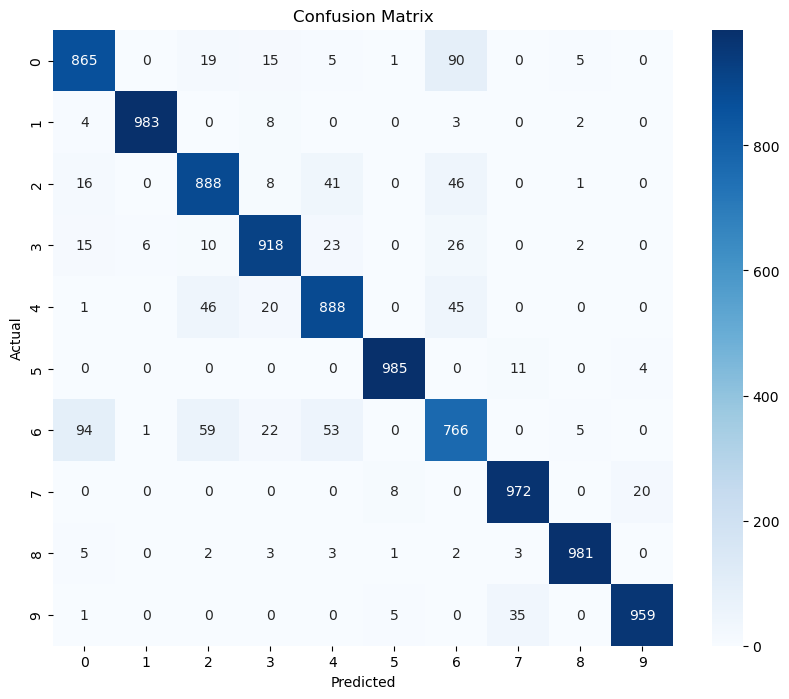

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
